In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import roc_auc_score, matthews_corrcoef
from os.path import join
import os
import matplotlib.pyplot as plt
import pandas as pd
import re
import statsmodels.api as sm
import seaborn as sns
import warnings
import sys
from sklearn import metrics
sys.path.append("./additional_code/")
from helper_functions import *
CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

/Users/vahidatabaigi/SIP/ESP_HardSplits/notebooks_and_code


# 2 Splits

### ROC-AUC score for 1D split on train Set

In [30]:
import numpy as np
import pandas as pd
from os.path import join

# Metrics file patterns and labels
metrics = ["acc", "loss", "ROC_AUC"]
models = ["ECFP", "PreGNN"]
datasets = [
    "ESP_2S", "ESPC2_2S", "C1e_2S", "C1f_2S", "I1e_2S", "I1f_2S", "C2_2S", 
    "ESP_D5258_2S", "ESP_NoEng_2S"
]

# Function to load numpy arrays and calculate averages
def load_and_calculate_metrics(metric, models, datasets):
    averages = {}
    for dataset in datasets:
        values = []
        for model in models:
            file_path = join(
                CURRENT_DIR, "..", "data", "training_results_2S",
                f"{metric}_CV_xgboost_ESM1b_ts_{model}_{dataset}.npy"
            )
            try:
                data = np.load(file_path)
                if metric == "loss":
                    values.append(np.log(np.mean(data)))  # Log transformation for loss
                else:
                    values.append(np.mean(data))  # For other metrics, just average
            except FileNotFoundError:
                values.append(np.nan)  # Handle missing files gracefully
        averages[dataset] = values
    return averages

# Load and calculate metrics
results = {metric: load_and_calculate_metrics(metric, models, datasets) for metric in metrics}

# Combine results into a DataFrame
combined_results = {}
for metric, data in results.items():
    df = pd.DataFrame(data, index=models)
    combined_results[metric] = df.T.round(2)

# Concatenate metrics for final table
final_table = pd.concat(combined_results, axis=1)
final_table.columns = pd.MultiIndex.from_product([metrics, models])

final_table


acc         loss        ROC_AUC       
              ECFP PreGNN  ECFP PreGNN    ECFP PreGNN
ESP_2S        0.91   0.92  4.71   4.66    0.96   0.96
ESPC2_2S      0.91   0.90  4.76   4.71    0.95   0.95
C1e_2S        0.69   0.39  7.40   7.14    0.53   0.51
C1f_2S        0.92   0.92  4.60   4.52    0.96   0.96
I1e_2S        0.70   0.58  7.35   7.25    0.54   0.56
I1f_2S        0.91   0.92  4.69   4.64    0.95   0.96
C2_2S         0.49   0.45  7.00   7.02    0.57   0.58
ESP_D5258_2S  0.89   0.91  4.93   4.88    0.94   0.94
ESP_NoEng_2S  0.90   0.90  4.92   4.90    0.94   0.94

### ROC-AUC score for 1D split on test Set

In [31]:
y_test_pred_esm1b_ts_ecfp_ESP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESP_2S.npy"))
test_y_esm1b_ts_ecfp_ESP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESP_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESP_2S.npy"))
test_y_esm1b_ts_gnn_ESP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESP_2S.npy"))
y_test_pred_esm1b_ts_ecfp_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1e_2S.npy"))
test_y_esm1b_ts_ecfp_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1e_2S.npy"))
y_test_pred_esm1b_ts_gnn_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1e_2S.npy"))
test_y_esm1b_ts_gnn_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1e_2S.npy"))
y_test_pred_esm1b_ts_ecfp_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1f_2S.npy"))
test_y_esm1b_ts_ecfp_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1f_2S.npy"))
y_test_pred_esm1b_ts_gnn_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1f_2S.npy"))
test_y_esm1b_ts_gnn_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1f_2S.npy"))
y_test_pred_esm1b_ts_ecfp_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1e_2S.npy"))
test_y_esm1b_ts_ecfp_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1e_2S.npy"))
y_test_pred_esm1b_ts_gnn_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1e_2S.npy"))
test_y_esm1b_ts_gnn_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1e_2S.npy"))
y_test_pred_esm1b_ts_ecfp_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1f_2S.npy"))
test_y_esm1b_ts_ecfp_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1f_2S.npy"))
y_test_pred_esm1b_ts_gnn_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1f_2S.npy"))
test_y_esm1b_ts_gnn_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1f_2S.npy"))

y_test_pred_esm1b_ts_ecfp_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C2_2S.npy"))
test_y_esm1b_ts_ecfp_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_C2_2S.npy"))
y_test_pred_esm1b_ts_ecfp_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESPC2_2S.npy"))
test_y_esm1b_ts_ecfp_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESPC2_2S.npy"))

In [32]:
from sklearn import metrics
fpr_esm1b_ts_ecfp_ESP_2S, tpr_esm1b_ts_ecfp_ESP_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESP_2S, y_test_pred_esm1b_ts_ecfp_ESP_2S)
roc_auc_esm1b_ts_ecfp_ESP_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESP_2S, tpr_esm1b_ts_ecfp_ESP_2S)
fpr_esm1b_ts_gnn_ESP_2S, tpr_esm1b_ts_gnn_ESP_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESP_2S, y_test_pred_esm1b_ts_gnn_ESP_2S)
roc_auc_esm1b_ts_gnn_ESP_2S = metrics.auc(fpr_esm1b_ts_gnn_ESP_2S, tpr_esm1b_ts_gnn_ESP_2S)

fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1e_2S, y_test_pred_esm1b_ts_ecfp_C1e_2S)
roc_auc_esm1b_ts_ecfp_C1e_2S = metrics.auc(fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S)
fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1e_2S, y_test_pred_esm1b_ts_gnn_C1e_2S)
roc_auc_esm1b_ts_gnn_C1e_2S = metrics.auc(fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S)


fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1f_2S, y_test_pred_esm1b_ts_ecfp_C1f_2S)
roc_auc_esm1b_ts_ecfp_C1f_2S = metrics.auc(fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S)
fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1f_2S, y_test_pred_esm1b_ts_gnn_C1f_2S)
roc_auc_esm1b_ts_gnn_C1f_2S = metrics.auc(fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S)


fpr_esm1b_ts_ecfp_I1e_2S, tpr_esm1b_ts_ecfp_I1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1e_2S, y_test_pred_esm1b_ts_ecfp_I1e_2S)
roc_auc_esm1b_ts_ecfp_I1e_2S = metrics.auc(fpr_esm1b_ts_ecfp_I1e_2S, tpr_esm1b_ts_ecfp_I1e_2S)
fpr_esm1b_ts_gnn_I1e_2S, tpr_esm1b_ts_gnn_I1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1e_2S, y_test_pred_esm1b_ts_gnn_I1e_2S)
roc_auc_esm1b_ts_gnn_I1e_2S = metrics.auc(fpr_esm1b_ts_gnn_I1e_2S, tpr_esm1b_ts_gnn_I1e_2S)

fpr_esm1b_ts_ecfp_I1f_2S, tpr_esm1b_ts_ecfp_I1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1f_2S, y_test_pred_esm1b_ts_ecfp_I1f_2S)
roc_auc_esm1b_ts_ecfp_I1f_2S = metrics.auc(fpr_esm1b_ts_ecfp_I1f_2S, tpr_esm1b_ts_ecfp_I1f_2S)
fpr_esm1b_ts_gnn_I1f_2S, tpr_esm1b_ts_gnn_I1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1f_2S, y_test_pred_esm1b_ts_gnn_I1f_2S)
roc_auc_esm1b_ts_gnn_I1f_2S = metrics.auc(fpr_esm1b_ts_gnn_I1f_2S, tpr_esm1b_ts_gnn_I1f_2S)


fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C2_2S, y_test_pred_esm1b_ts_ecfp_C2_2S)
roc_auc_esm1b_ts_ecfp_C2_2S = metrics.auc(fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S)
fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESPC2_2S, y_test_pred_esm1b_ts_ecfp_ESPC2_2S)
roc_auc_esm1b_ts_ecfp_ESPC2_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S)

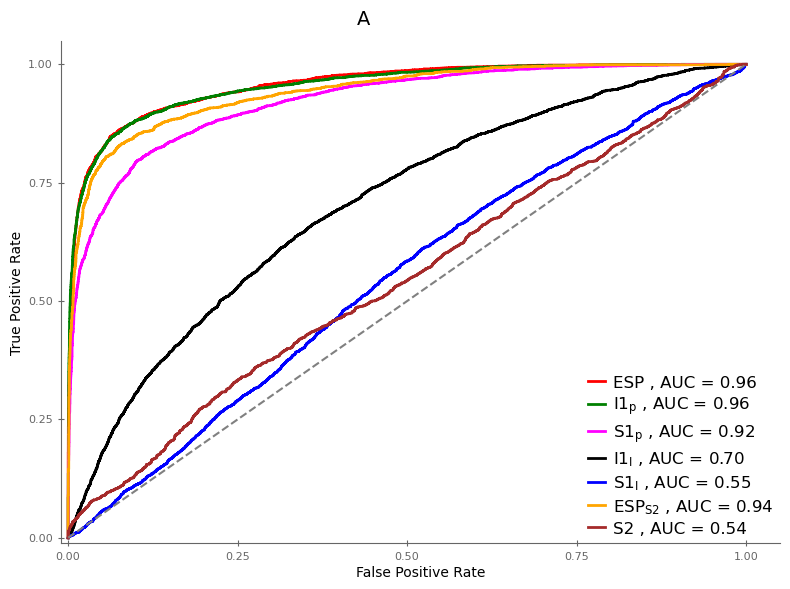

In [33]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label} , AUC = {roc_auc:.2f}', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(8, 6))
plt.rcParams.update({'font.size': 10}) 
# Define your data and labels here
"""
data = [
    (fpr_esm1b_ts_ecfp_ESP_2S, tpr_esm1b_ts_ecfp_ESP_2S, roc_auc_esm1b_ts_ecfp_ESP_2S, 'ESP, [ESM1bts + ECFP] ', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_ESP_2S, tpr_esm1b_ts_gnn_ESP_2S, roc_auc_esm1b_ts_gnn_ESP_2S, 'ESP, [ESM1bts + PreGNN] ', 'dashed', 'red'),
    (fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S, roc_auc_esm1b_ts_ecfp_C1f_2S, 'S1p, [ESM1bts + ECFP]', 'solid', 'magenta'),
    (fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S, roc_auc_esm1b_ts_gnn_C1f_2S, 'S1p, [ESM1bts + PreGNN]', 'dashed', 'magenta'),
    (fpr_esm1b_ts_ecfp_I1f_2S, tpr_esm1b_ts_ecfp_I1f_2S, roc_auc_esm1b_ts_ecfp_I1f_2S, 'I1p, [ESM1bts + ECFP]', 'solid', 'green'),
    (fpr_esm1b_ts_gnn_I1f_2S, tpr_esm1b_ts_gnn_I1f_2S, roc_auc_esm1b_ts_gnn_I1f_2S, 'I1p, [ESM1bts + PreGNN]', 'dashed', 'green'),
    (fpr_esm1b_ts_ecfp_I1e_2S, tpr_esm1b_ts_ecfp_I1e_2S, roc_auc_esm1b_ts_ecfp_I1e_2S, 'I1l, [ESM1bts + ECFP]', 'solid', 'black'),
    (fpr_esm1b_ts_gnn_I1e_2S, tpr_esm1b_ts_gnn_I1e_2S, roc_auc_esm1b_ts_gnn_I1e_2S, 'I1l, [ESM1bts + PreGNN]', 'dashed', 'black'),
    (fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S, roc_auc_esm1b_ts_ecfp_C1e_2S, 'S1l, [ESM1bts + ECFP]', 'solid', 'blue'),
    (fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S, roc_auc_esm1b_ts_gnn_C1e_2S, 'S1l, [ESM1bts + PreGNN]', 'dashed', 'blue'),
]
"""
data = [
    (fpr_esm1b_ts_ecfp_ESP_2S, tpr_esm1b_ts_ecfp_ESP_2S, roc_auc_esm1b_ts_ecfp_ESP_2S, 'ESP', 'solid', 'red'),
    (fpr_esm1b_ts_ecfp_I1f_2S, tpr_esm1b_ts_ecfp_I1f_2S, roc_auc_esm1b_ts_ecfp_I1f_2S, 'I1$_{p}$', 'solid', 'green'),
    (fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S, roc_auc_esm1b_ts_ecfp_C1f_2S, 'S1$_{p}$', 'solid', 'magenta'),
    (fpr_esm1b_ts_ecfp_I1e_2S, tpr_esm1b_ts_ecfp_I1e_2S, roc_auc_esm1b_ts_ecfp_I1e_2S, 'I1$_{l}$', 'solid', 'black'),
    (fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S, roc_auc_esm1b_ts_ecfp_C1e_2S, 'S1$_{l}$', 'solid', 'blue'),
    (fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S, roc_auc_esm1b_ts_ecfp_ESPC2_2S, 'ESP$_{S2}$', 'solid', 'orange'),
    (fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S, roc_auc_esm1b_ts_ecfp_C2_2S, 'S2', 'solid', 'brown'),
]
# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)
ax.tick_params(axis='x', labelsize=8)  # Smaller x-axis numbers
ax.tick_params(axis='y', labelsize=8)  # Smaller y-axis numbers
# Set legend
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], '--', color='gray', linewidth=1.5) 
plt.xlim([-0.01, 1.05]) 
plt.ylim([-0.01, 1.05])  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curves for train:test(80:20) splits')
plt.title('A', x=0.42,fontsize=14)
#plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()
#plt.savefig('/Users/vahidatabaigi/Desktop/Thesis/thesis-template/Figures/AUC2S.png', dpi=600, bbox_inches='tight')
plt.savefig('/Users/vahidatabaigi/Desktop/AUC2S.png', dpi=600, bbox_inches='tight')
plt.show()


In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to calculate MCC, Accuracy, and Custom Loss
def calculate_metrics(y_true, y_pred):
    # Binary classification threshold
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_binary)
    TN, FP, FN, TP = cm.ravel()
    
    # Calculate MCC
    numerator = (TP * TN) - (FP * FN)
    denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    mcc = numerator / denominator if denominator > 0 else 0  # Handle division by zero
    
    # Calculate Accuracy
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    
    # Custom Loss
    loss = 2 * (FN ** 2) + (FP ** 1.3)
    
    return mcc, accuracy, loss

# Dataset names and their corresponding true and predicted labels

datasets = [
    ('ECFP ESP', test_y_esm1b_ts_ecfp_ESP_2S, y_test_pred_esm1b_ts_ecfp_ESP_2S),
    ('GNN ESP', test_y_esm1b_ts_gnn_ESP_2S, y_test_pred_esm1b_ts_gnn_ESP_2S),
    ('ECFP S1l', test_y_esm1b_ts_ecfp_C1e_2S, y_test_pred_esm1b_ts_ecfp_C1e_2S),
    ('GNN S1e', test_y_esm1b_ts_gnn_C1e_2S, y_test_pred_esm1b_ts_gnn_C1e_2S),
    ('ECFP S1p', test_y_esm1b_ts_ecfp_C1f_2S, y_test_pred_esm1b_ts_ecfp_C1f_2S),
    ('GNN S1p', test_y_esm1b_ts_gnn_C1f_2S, y_test_pred_esm1b_ts_gnn_C1f_2S),
    ('ECFP I1l', test_y_esm1b_ts_ecfp_I1e_2S, y_test_pred_esm1b_ts_ecfp_I1e_2S),
    ('GNN I1l', test_y_esm1b_ts_gnn_I1e_2S, y_test_pred_esm1b_ts_gnn_I1e_2S),
    ('ECFP I1p', test_y_esm1b_ts_ecfp_I1f_2S, y_test_pred_esm1b_ts_ecfp_I1f_2S),
    ('GNN I1p', test_y_esm1b_ts_gnn_I1f_2S, y_test_pred_esm1b_ts_gnn_I1f_2S)
]

# Calculate MCC, Accuracy, and Loss for each dataset
results = []
for name, y_true, y_pred in datasets:
    mcc, accuracy, loss = calculate_metrics(y_true, y_pred)
    results.append((name, mcc, accuracy, np.log(loss)))

# Create and display the results table
print(f"{'Model':<20} {'MCC':<10} {'Accuracy':<10} {'Loss':<10}")
print("=" * 50)
for name, mcc, accuracy, loss in results:
    print(f"{name:<20} {mcc:.4f}    {accuracy:.4f}    {loss:.4f}")


Model                MCC        Accuracy   Loss      
ECFP ESP             0.7795    0.9153    13.6391
GNN ESP              0.7923    0.9201    13.5082
ECFP S1l             0.0160    0.6846    16.8311
GNN S1e              -0.0139    0.3057    12.9772
ECFP S1p             0.6778    0.8800    14.7843
GNN S1p              0.6894    0.8843    14.7508
ECFP I1l             0.2303    0.7457    16.5561
GNN I1l              0.0863    0.4691    14.6540
ECFP I1p             0.7765    0.9129    13.4494
GNN I1p              0.7940    0.9211    13.6381


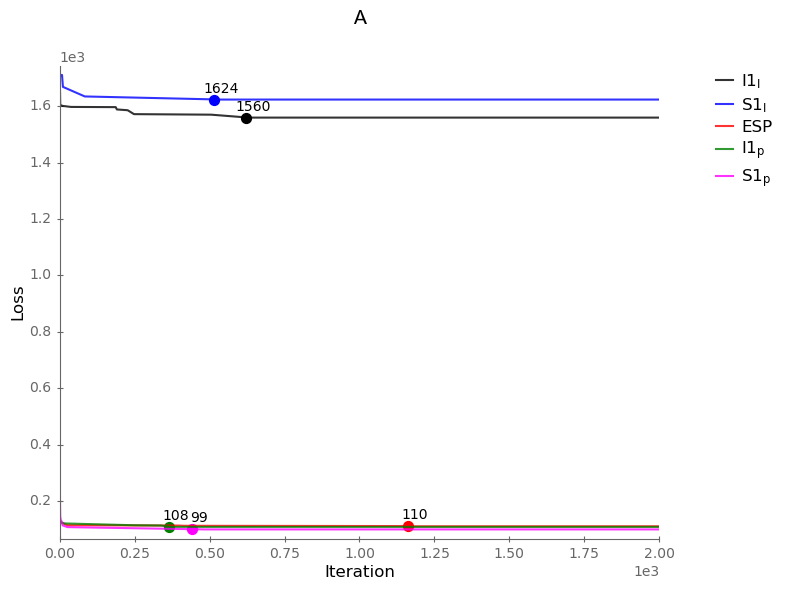

In [35]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESP': 'red', 'S1$_{l}$': 'blue', 'S1$_{p}$': 'magenta', 'I1$_{l}$': 'black', 'I1$_{p}$': 'green'}

plotting_loss("ECFP", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=2,title="A")

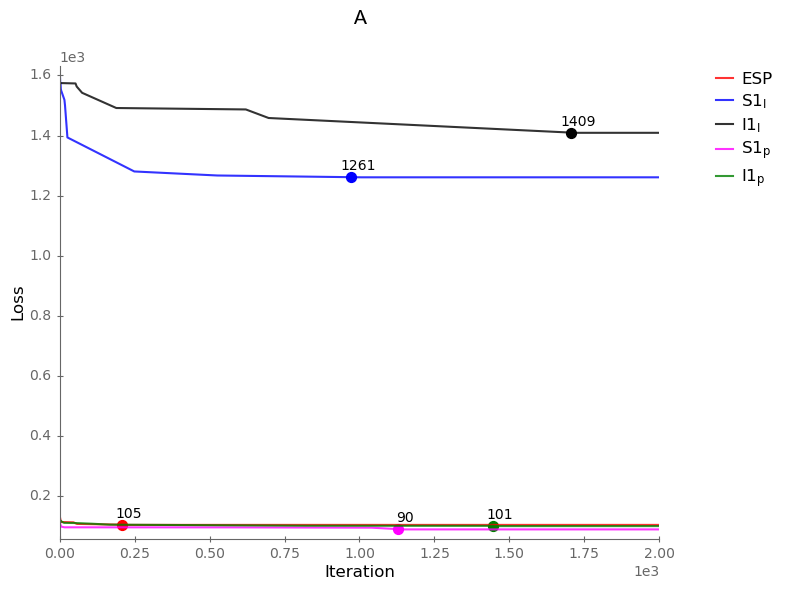

In [36]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESP': 'red', 'S1$_{l}$': 'blue', 'S1$_{p}$': 'magenta', 'I1$_{l}$': 'black', 'I1$_{p}$': 'green'}
plotting_loss("PreGNN", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=2,title="A")

### ROC-AUC score for 2D split

In [37]:
y_test_pred_esm1b_ts_gnn_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data","training_results_2S","y_test_pred_xgboost_ESM1b_ts_PreGNN_C2_2S.npy"))
test_y_esm1b_ts_gnn_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S",  "y_test_true_xgboost_ESM1b_ts_PreGNN_C2_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S","y_test_pred_xgboost_ESM1b_ts_PreGNN_ESPC2_2S.npy"))
test_y_esm1b_ts_gnn_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESPC2_2S.npy"))

In [38]:
y_test_pred_esm1b_ts_ecfp_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C2_2S.npy"))
test_y_esm1b_ts_ecfp_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_C2_2S.npy"))
y_test_pred_esm1b_ts_ecfp_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESPC2_2S.npy"))
test_y_esm1b_ts_ecfp_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESPC2_2S.npy"))

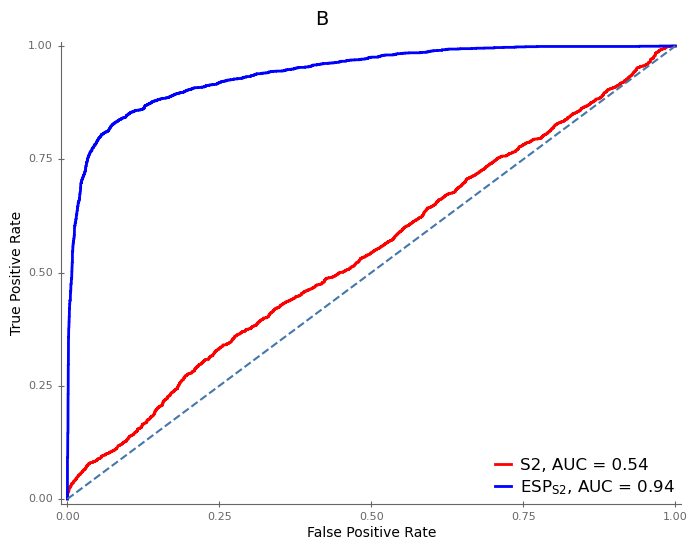

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.rcParams.update({'font.size': 10})

fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C2_2S, y_test_pred_esm1b_ts_ecfp_C2_2S)
roc_auc_esm1b_ts_ecfp_C2_2S = metrics.auc(fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S)
fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESPC2_2S, y_test_pred_esm1b_ts_ecfp_ESPC2_2S)
roc_auc_esm1b_ts_ecfp_ESPC2_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S)

fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C2_2S, y_test_pred_esm1b_ts_gnn_C2_2S)
roc_auc_esm1b_ts_gnn_C2_2S = metrics.auc(fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S)
fpr_esm1b_ts_gnn_ESPC2_2S, tpr_esm1b_ts_gnn_ESPC2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESPC2_2S, y_test_pred_esm1b_ts_gnn_ESPC2_2S)
roc_auc_esm1b_ts_gnn_ESPC2_2S = metrics.auc(fpr_esm1b_ts_gnn_ESPC2_2S, tpr_esm1b_ts_gnn_ESPC2_2S)


# plt.plot(fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S, 'red', label='S2, [ESM1bts + PreGNN], AUC = %0.2f' % roc_auc_esm1b_ts_gnn_C2_2S, linewidth=2.0, linestyle='dashed')
plt.plot(fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S, 'red', label='S2, AUC = %0.2f' % roc_auc_esm1b_ts_ecfp_C2_2S, linewidth=2.0)
# plt.plot(fpr_esm1b_ts_gnn_ESPC2_2S, tpr_esm1b_ts_gnn_ESPC2_2S, 'blue', label='ESPS2, [ESM1bts + PreGNN], AUC = %0.2f' % roc_auc_esm1b_ts_gnn_ESPC2_2S, linewidth=2.0, linestyle='dashed')
plt.plot(fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S, 'blue', label='ESP$_{S2}$, AUC = %0.2f' % roc_auc_esm1b_ts_ecfp_ESPC2_2S, linewidth=2.0)

ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)
ax.tick_params(axis='x', labelsize=8)  # Smaller x-axis numbers
ax.tick_params(axis='y', labelsize=8)
plt.title('B', x=0.42,fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], '--')
eps = 0.01
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig("/Users/vahidatabaigi/Desktop/Thesis/thesis-template/Figures/AUCC2.png", dpi=600, bbox_inches='tight')
plt.savefig("/Users/vahidatabaigi/Desktop/AUCC2.png", dpi=600, bbox_inches='tight')
plt.show()


In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to calculate MCC and Accuracy
def calculate_metrics(y_true, y_pred):
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    cm = confusion_matrix(y_true, y_pred_binary)
    TN, FP, FN, TP = cm.ravel()
    
    # Calculate MCC
    numerator = (TP * TN) - (FP * FN)
    denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    mcc = numerator / denominator if denominator > 0 else 0  # Handle division by zero
    
    # Calculate Accuracy
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    return mcc, accuracy

# Dataset names and their corresponding true and predicted labels
datasets = [
    ('ECFP S2', test_y_esm1b_ts_ecfp_C2_2S, y_test_pred_esm1b_ts_ecfp_C2_2S),
    ('ECFP ESPS2', test_y_esm1b_ts_ecfp_ESPC2_2S, y_test_pred_esm1b_ts_ecfp_ESPC2_2S),
    ('GNN S2', test_y_esm1b_ts_gnn_C2_2S, y_test_pred_esm1b_ts_gnn_C2_2S),
    ('GNN ESPS2', test_y_esm1b_ts_gnn_ESPC2_2S, y_test_pred_esm1b_ts_gnn_ESPC2_2S)
]

# Calculate MCC and Accuracy for each dataset
results = []
for name, y_true, y_pred in datasets:
    mcc, accuracy = calculate_metrics(y_true, y_pred)
    results.append((name, mcc, accuracy))

# Create and display the results table
print(f"{'Model':<20} {'MCC':<10} {'Accuracy':<10}")
print("=" * 40)
for name, mcc, accuracy in results:
    print(f"{name:<20} {mcc:.4f}    {accuracy:.4f}")


Model                MCC        Accuracy  
ECFP S2              0.0242    0.2963
ECFP ESPS2           0.7518    0.9046
GNN S2               -0.0055    0.3074
GNN ESPS2            0.7249    0.8915


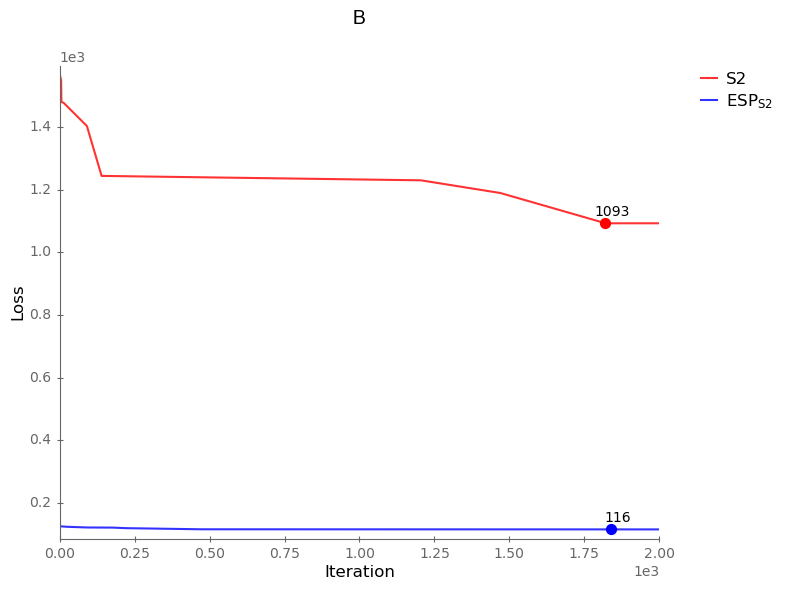

In [41]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESP$_{S2}$': 'blue', 'S2': 'red'}

plotting_loss("ECFP", experiment="2D", log_directory=log_directory, color_map=color_map, split_number=2,title="B")

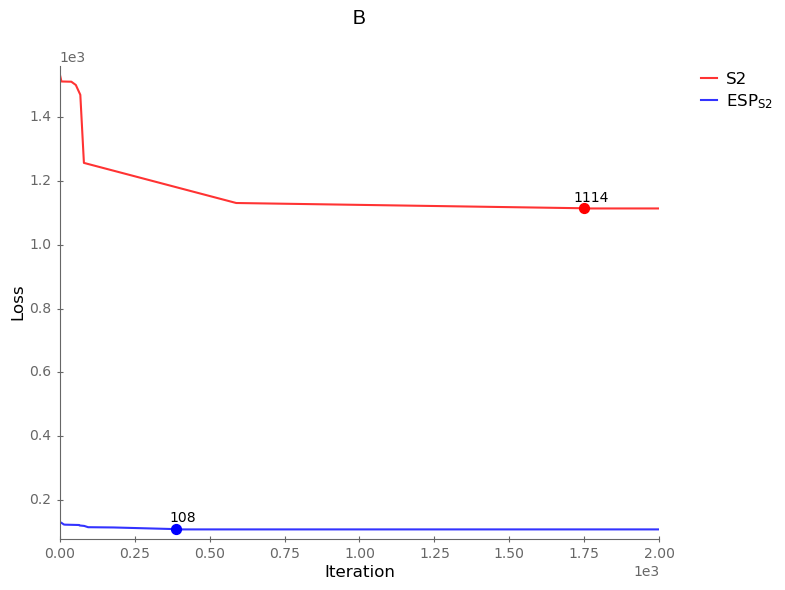

In [42]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESP$_{S2}$': 'blue', 'S2': 'red'}

plotting_loss("PreGNN", experiment="2D", log_directory=log_directory, color_map=color_map, split_number=2,title="B")

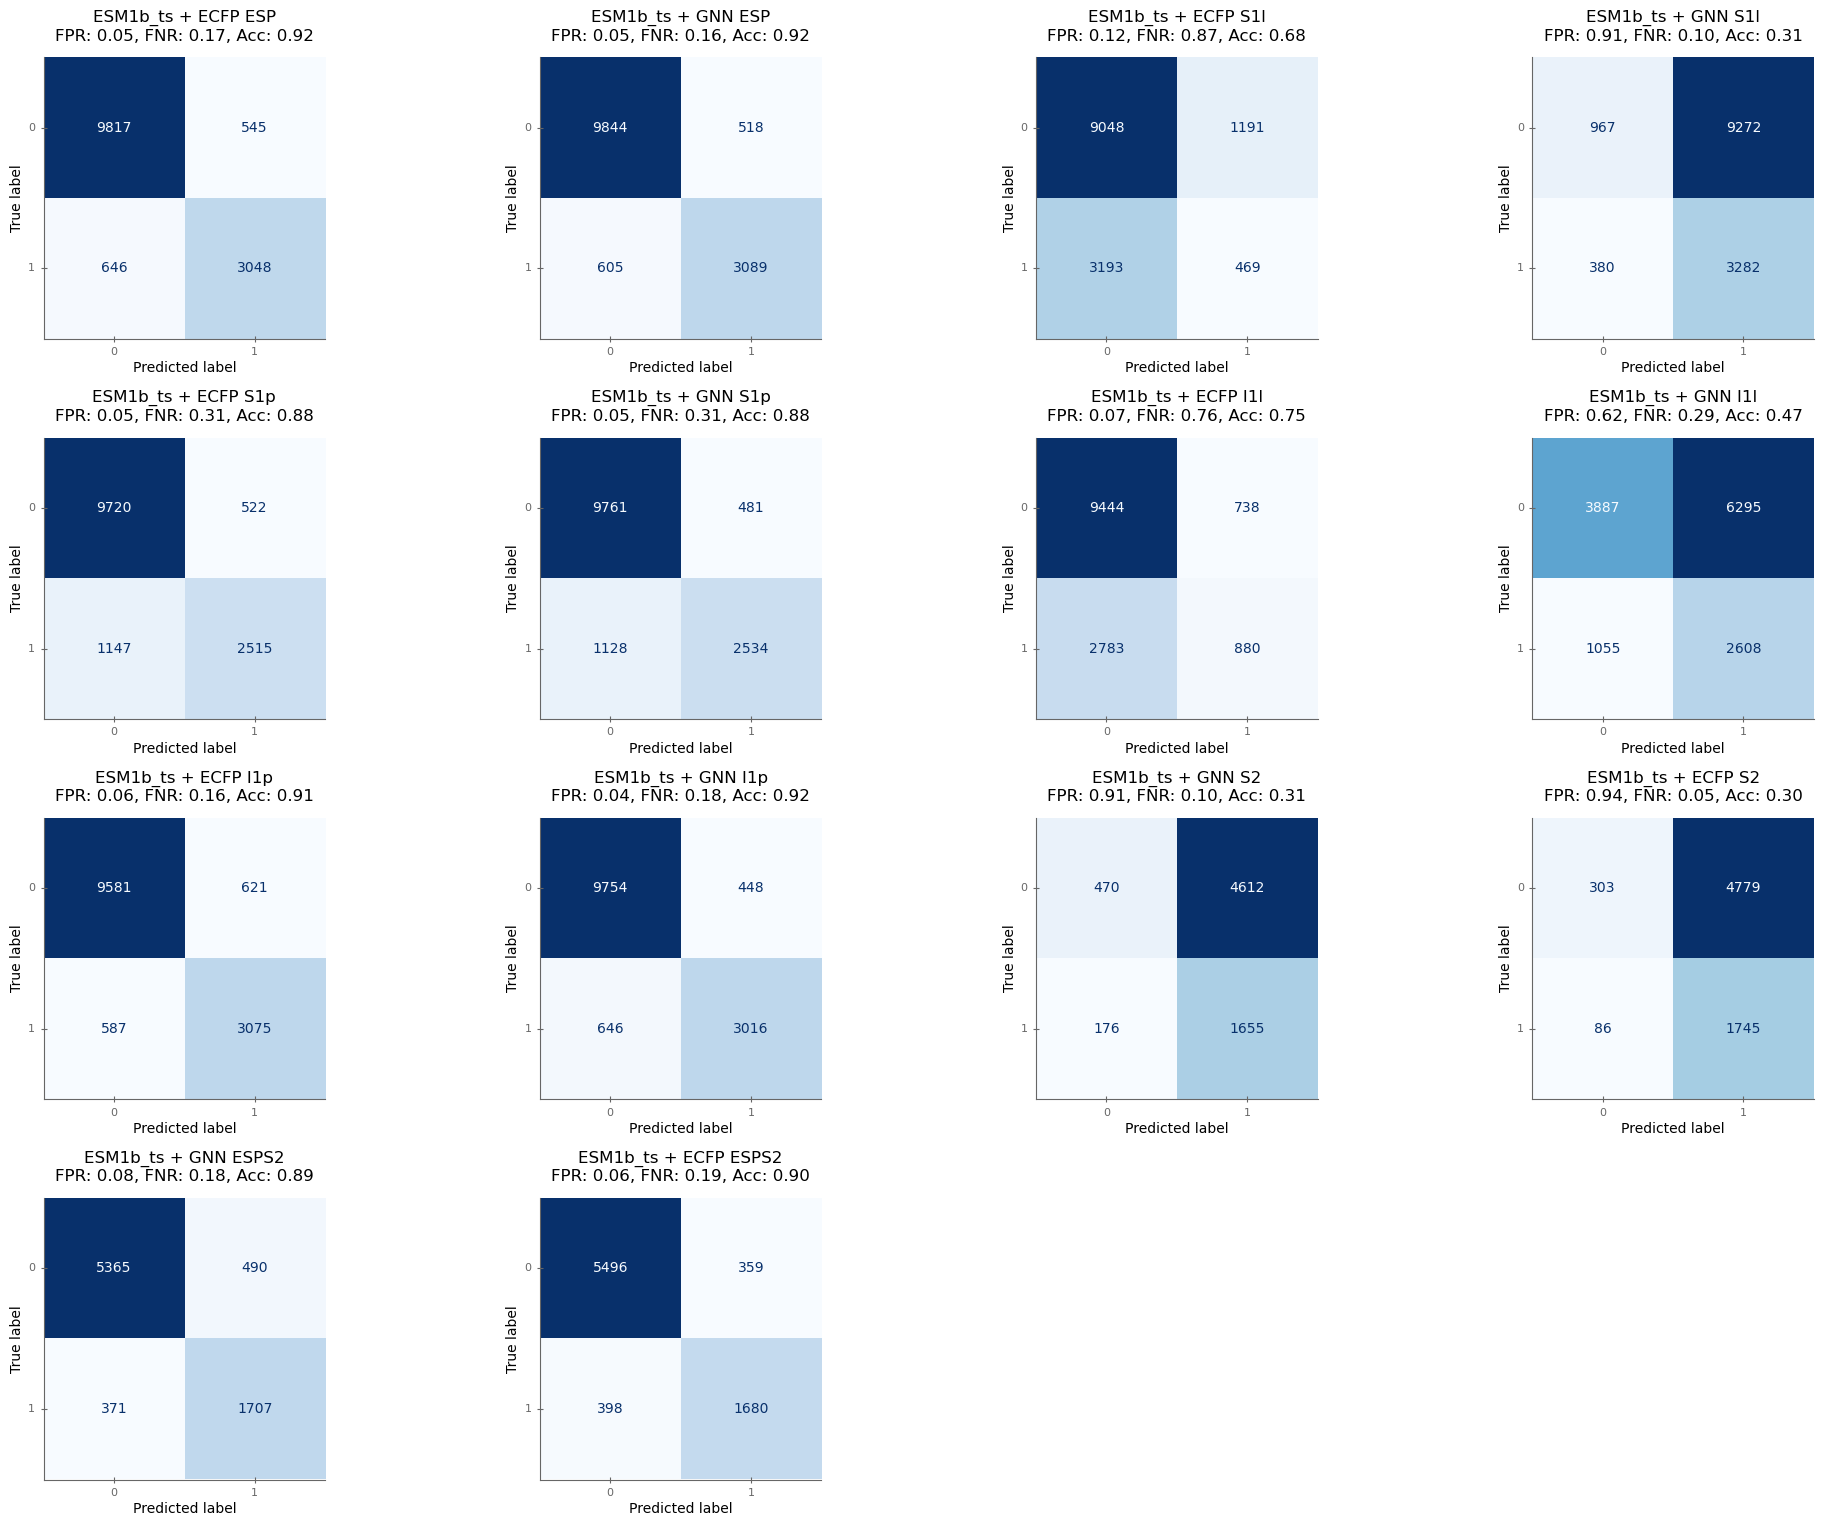

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def calculate_fpr_fnr_accuracy(y_true, y_pred):
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    cm = confusion_matrix(y_true, y_pred_binary)
    TN, FP, FN, TP = cm.ravel()
    fpr = FP / (FP + TN)
    fnr = FN / (FN + TP)
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    return fpr, fnr, accuracy, cm

datasets = [
    ('ECFP ESP', test_y_esm1b_ts_ecfp_ESP_2S, y_test_pred_esm1b_ts_ecfp_ESP_2S),
    ('GNN ESP', test_y_esm1b_ts_gnn_ESP_2S, y_test_pred_esm1b_ts_gnn_ESP_2S),
    ('ECFP S1l', test_y_esm1b_ts_ecfp_C1e_2S, y_test_pred_esm1b_ts_ecfp_C1e_2S),
    ('GNN S1l', test_y_esm1b_ts_gnn_C1e_2S, y_test_pred_esm1b_ts_gnn_C1e_2S),
    ('ECFP S1p', test_y_esm1b_ts_ecfp_C1f_2S, y_test_pred_esm1b_ts_ecfp_C1f_2S),
    ('GNN S1p', test_y_esm1b_ts_gnn_C1f_2S, y_test_pred_esm1b_ts_gnn_C1f_2S),
    ('ECFP I1l', test_y_esm1b_ts_ecfp_I1e_2S, y_test_pred_esm1b_ts_ecfp_I1e_2S),
    ('GNN I1l', test_y_esm1b_ts_gnn_I1e_2S, y_test_pred_esm1b_ts_gnn_I1e_2S),
    ('ECFP I1p', test_y_esm1b_ts_ecfp_I1f_2S, y_test_pred_esm1b_ts_ecfp_I1f_2S),
    ('GNN I1p', test_y_esm1b_ts_gnn_I1f_2S, y_test_pred_esm1b_ts_gnn_I1f_2S),
    ('GNN S2', test_y_esm1b_ts_gnn_C2_2S, y_test_pred_esm1b_ts_gnn_C2_2S),
    ('ECFP S2', test_y_esm1b_ts_ecfp_C2_2S, y_test_pred_esm1b_ts_ecfp_C2_2S),
    ('GNN ESPS2', test_y_esm1b_ts_gnn_ESPC2_2S, y_test_pred_esm1b_ts_gnn_ESPC2_2S),
    ('ECFP ESPS2', test_y_esm1b_ts_ecfp_ESPC2_2S, y_test_pred_esm1b_ts_ecfp_ESPC2_2S)
]

n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))

for i, (name, y_true, y_pred) in enumerate(datasets):
    fpr, fnr, accuracy, cm = calculate_fpr_fnr_accuracy(y_true, y_pred)
    row, col = divmod(i, n_cols)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[row, col], cmap='Blues', colorbar=False)
    axes[row, col].set_title(f"ESM1b_ts + {name}\nFPR: {fpr:.2f}, FNR: {fnr:.2f}, Acc: {accuracy:.2f}", fontsize=12)
    for text in axes[row, col].texts:
        text.set_fontsize(10)
        
    axes[row, col].tick_params(axis='both', which='major', labelsize=8)
    axes[row, col].set_xlabel(axes[row, col].get_xlabel(), fontsize=10)
    axes[row, col].set_ylabel(axes[row, col].get_ylabel(), fontsize=10)

for j in range(len(datasets), n_rows * n_cols):
    fig.delaxes(axes.flat[j])
plt.subplots_adjust(hspace=0.9, wspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure before displaying it
plt.savefig('/Users/vahidatabaigi/Desktop/Thesis/thesis-template/Figures/CM2S.png', dpi=600, bbox_inches='tight')
plt.show()


### ROC-AUC score for 1D split and NoATP

In [44]:
y_test_pred_esm1b_ts_ecfp_ESP_D5258_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESP_D5258_2S.npy"))
test_y_esm1b_ts_ecfp_ESP_D5258_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESP_D5258_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESP_D5258_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESP_D5258_2S.npy"))
test_y_esm1b_ts_gnn_ESP_D5258_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESP_D5258_2S.npy"))

y_test_pred_esm1b_ts_ecfp_ESP_NoEng_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESP_NOEng_2S.npy"))
test_y_esm1b_ts_ecfp_ESP_NoEng_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESP_NoEng_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESP_NoEng_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESP_NoEng_2S.npy"))
test_y_esm1b_ts_gnn_ESP_NoEng_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESP_NoEng_2S.npy"))



In [45]:

fpr_esm1b_ts_ecfp_ESP_D5258_2S, tpr_esm1b_ts_ecfp_ESP_D5258_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESP_D5258_2S, y_test_pred_esm1b_ts_ecfp_ESP_D5258_2S)
roc_auc_esm1b_ts_ecfp_ESP_D5258_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESP_D5258_2S, tpr_esm1b_ts_ecfp_ESP_D5258_2S)
fpr_esm1b_ts_gnn_ESP_D5258_2S, tpr_esm1b_ts_gnn_ESP_D5258_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESP_D5258_2S, y_test_pred_esm1b_ts_gnn_ESP_D5258_2S)
roc_auc_esm1b_ts_gnn_ESP_D5258_2S = metrics.auc(fpr_esm1b_ts_gnn_ESP_D5258_2S, tpr_esm1b_ts_gnn_ESP_D5258_2S)

fpr_esm1b_ts_ecfp_ESP_NoEng_2S, tpr_esm1b_ts_ecfp_ESP_NoEng_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESP_NoEng_2S, y_test_pred_esm1b_ts_ecfp_ESP_NoEng_2S)
roc_auc_esm1b_ts_ecfp_ESP_NoEng_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESP_NoEng_2S, tpr_esm1b_ts_ecfp_ESP_NoEng_2S)
fpr_esm1b_ts_gnn_ESP_NoEng_2S, tpr_esm1b_ts_gnn_ESP_NoEng_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESP_NoEng_2S, y_test_pred_esm1b_ts_gnn_ESP_NoEng_2S)
roc_auc_esm1b_ts_gnn_ESP_NoEng_2S = metrics.auc(fpr_esm1b_ts_gnn_ESP_NoEng_2S, tpr_esm1b_ts_gnn_ESP_NoEng_2S)


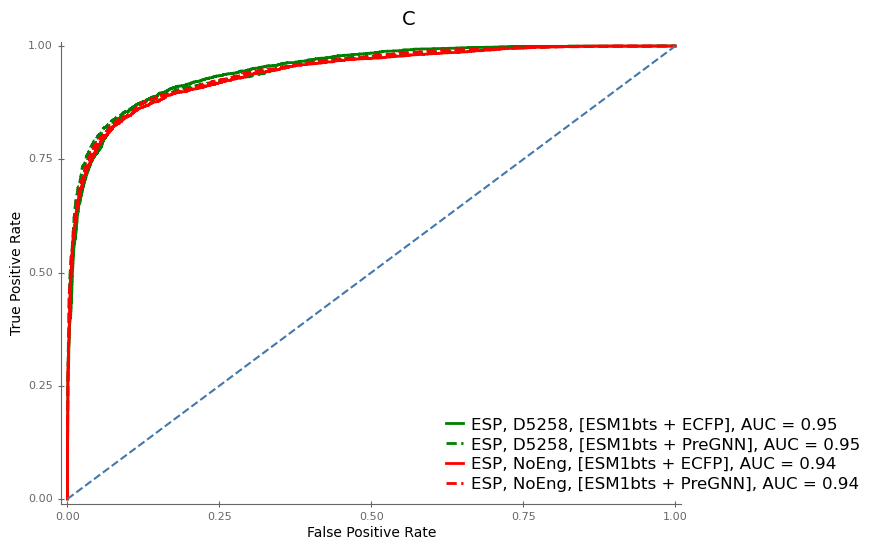

In [46]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label}, AUC = {roc_auc:.2f}', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(8, 6))
plt.rcParams.update({'font.size': 10})

# Define your data and labels here
data = [
    
    (fpr_esm1b_ts_ecfp_ESP_D5258_2S, tpr_esm1b_ts_ecfp_ESP_D5258_2S, roc_auc_esm1b_ts_ecfp_ESP_D5258_2S, 'ESP, D5258, [ESM1bts + ECFP]', 'solid', 'green'),
    (fpr_esm1b_ts_gnn_ESP_D5258_2S, tpr_esm1b_ts_gnn_ESP_D5258_2S, roc_auc_esm1b_ts_gnn_ESP_D5258_2S, 'ESP, D5258, [ESM1bts + PreGNN]', 'dashed', 'green'),
    
    (fpr_esm1b_ts_ecfp_ESP_NoEng_2S, tpr_esm1b_ts_ecfp_ESP_NoEng_2S, roc_auc_esm1b_ts_ecfp_ESP_NoEng_2S, 'ESP, NoEng, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_ESP_NoEng_2S, tpr_esm1b_ts_gnn_ESP_NoEng_2S, roc_auc_esm1b_ts_gnn_ESP_NoEng_2S, 'ESP, NoEng, [ESM1bts + PreGNN]', 'dashed', 'red'),

]
# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)
ax.tick_params(axis='x', labelsize=8)  # Smaller x-axis numbers
ax.tick_params(axis='y', labelsize=8)
plt.title('C', x=0.56,fontsize=14)
# Set legend
plt.legend(loc='lower right', bbox_to_anchor=(1.30, 0.01), fontsize=12)
plt.plot([0, 1], [0, 1], '--')
eps = 0.01
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('/Users/vahidatabaigi/Desktop/Thesis/thesis-template/Figures/AUCATP.png', dpi=600, bbox_inches='tight')
plt.show()


In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to calculate MCC and Accuracy
def calculate_metrics(y_true, y_pred):
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    cm = confusion_matrix(y_true, y_pred_binary)
    TN, FP, FN, TP = cm.ravel()
    
    # Calculate MCC
    numerator = (TP * TN) - (FP * FN)
    denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    mcc = numerator / denominator if denominator > 0 else 0  # Handle division by zero
    
    # Calculate Accuracy
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    return mcc, accuracy

# Dataset names and their corresponding true and predicted labels
datasets = [
    ('ECFP ESP_D5258', test_y_esm1b_ts_ecfp_ESP_D5258_2S, y_test_pred_esm1b_ts_ecfp_ESP_D5258_2S),
    ('GNN ESP_D5258', test_y_esm1b_ts_gnn_ESP_D5258_2S, y_test_pred_esm1b_ts_gnn_ESP_D5258_2S),
    ('ECFP ESP_NoEng', test_y_esm1b_ts_ecfp_ESP_NoEng_2S, y_test_pred_esm1b_ts_ecfp_ESP_NoEng_2S),
    ('GNN ESP_NoEng', test_y_esm1b_ts_gnn_ESP_NoEng_2S, y_test_pred_esm1b_ts_gnn_ESP_NoEng_2S)
]

# Calculate MCC and Accuracy for each dataset
results = []
for name, y_true, y_pred in datasets:
    mcc, accuracy = calculate_metrics(y_true, y_pred)
    results.append((name, mcc, accuracy))

# Create and display the results table
print(f"{'Model':<20} {'MCC':<10} {'Accuracy':<10}")
print("=" * 40)
for name, mcc, accuracy in results:
    print(f"{name:<20} {mcc:.4f}    {accuracy:.4f}")


Model                MCC        Accuracy  
ECFP ESP_D5258       0.7360    0.8949
GNN ESP_D5258        0.7639    0.9095
ECFP ESP_NoEng       0.7439    0.9013
GNN ESP_NoEng        0.7456    0.9003


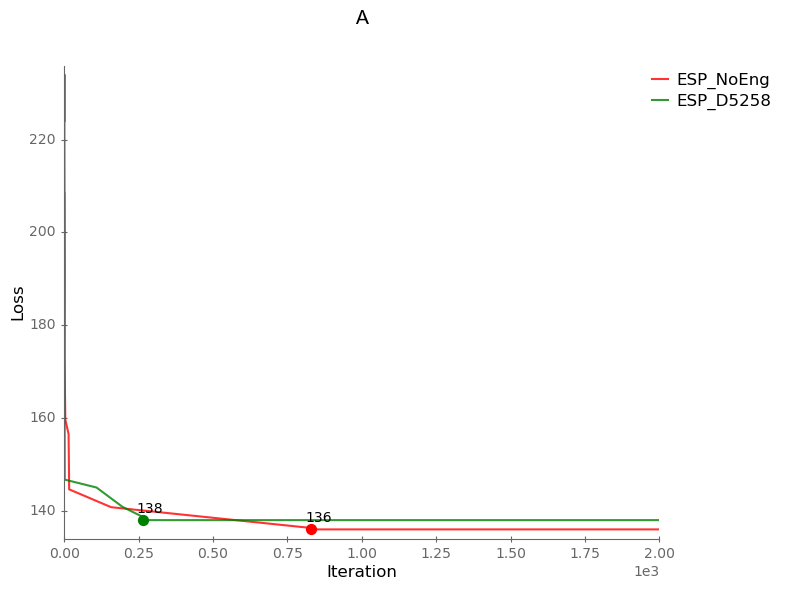

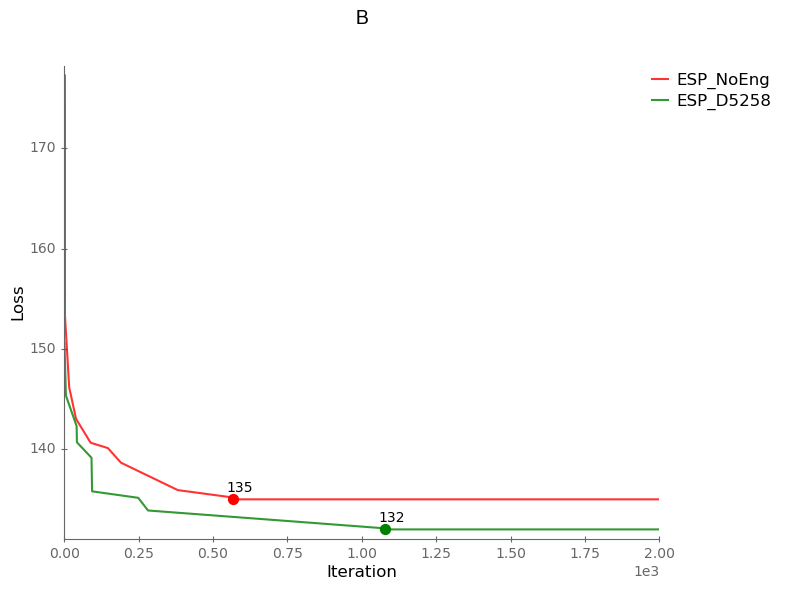

In [48]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESP_NoEng': 'red', 'ESP_D5258': 'green'}

plotting_loss("ECFP", experiment="NoEng", log_directory=log_directory, color_map=color_map, split_number=2,title="A")
plotting_loss("PreGNN", experiment="NoEng", log_directory=log_directory, color_map=color_map, split_number=2,title="B")

In [49]:
test_NoEng = pd.read_pickle(join("..", "data", "2splits", "test_ESP_NoEng_2S.pkl"))
train_NoEng = pd.read_pickle(join("..", "data", "2splits", "train_ESP_NoEng_2S.pkl"))

In [50]:
test_D5258 = pd.read_pickle(join("..", "data", "2splits", "test_ESP_D5258_2S.pkl"))
train_D5258 = pd.read_pickle(join("..", "data", "2splits", "train_ESP_D5258_2S.pkl"))

# 3 splits

### ROC-AUC score for 1D split

In [51]:
import numpy as np
import pandas as pd
from os.path import join

# Metrics file patterns and labels
metrics = ["accuracy", "mcc", "roc_auc"]
models = ["ECFP", "PreGNN"]
datasets = [
    "ESP_3S", "C1e_3S", "C1f_3S", "I1e_3S", "I1f_3S"
]

# Function to load numpy arrays and calculate averages
def load_and_calculate_metrics(metric, models, datasets):
    averages = {}
    for dataset in datasets:
        values = []
        for model in models:
            file_path = join(
                CURRENT_DIR, "..", "data", "training_results_3S",
                f"{metric}_val_xgboost_ESM1b_ts_{model}_{dataset}.npy"
            )
            try:
                data = np.load(file_path)
                values.append(np.mean(data))  # For other metrics, just average
            except FileNotFoundError:
                values.append(np.nan)  # Handle missing files gracefully
        averages[dataset] = values
    return averages

# Load and calculate metrics
results = {metric: load_and_calculate_metrics(metric, models, datasets) for metric in metrics}

# Combine results into a DataFrame
combined_results = {}
for metric, data in results.items():
    df = pd.DataFrame(data, index=models)
    combined_results[metric] = df.T.round(2)

# Concatenate metrics for final table
final_table = pd.concat(combined_results, axis=1)
final_table.columns = pd.MultiIndex.from_product([metrics, models])

final_table


accuracy          mcc        roc_auc       
           ECFP PreGNN  ECFP PreGNN    ECFP PreGNN
ESP_3S     0.87   0.87  0.68   0.68    0.93   0.92
C1e_3S     0.61   0.45  0.14   0.03    0.60   0.54
C1f_3S     0.82   0.69  0.59   0.45    0.90   0.88
I1e_3S     0.45   0.57  0.21   0.26    0.75   0.75
I1f_3S     0.90   0.89  0.75   0.73    0.94   0.93

In [52]:
y_test_pred_esm1b_ts_ecfp_ESP_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESP_3S.npy"))
test_y_esm1b_ts_ecfp_ESP_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESP_3S.npy"))
y_test_pred_esm1b_ts_gnn_ESP_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESP_3S.npy"))
test_y_esm1b_ts_gnn_ESP_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESP_3S.npy"))


y_test_pred_esm1b_ts_ecfp_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1e_3S.npy"))
test_y_esm1b_ts_ecfp_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1e_3S.npy"))
y_test_pred_esm1b_ts_gnn_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1e_3S.npy"))
test_y_esm1b_ts_gnn_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1e_3S.npy"))

y_test_pred_esm1b_ts_ecfp_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1f_3S.npy"))
test_y_esm1b_ts_ecfp_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1f_3S.npy"))
y_test_pred_esm1b_ts_gnn_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1f_3S.npy"))
test_y_esm1b_ts_gnn_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1f_3S.npy"))

y_test_pred_esm1b_ts_ecfp_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1e_3S.npy"))
test_y_esm1b_ts_ecfp_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1e_3S.npy"))
y_test_pred_esm1b_ts_gnn_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1e_3S.npy"))
test_y_esm1b_ts_gnn_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1e_3S.npy"))

y_test_pred_esm1b_ts_ecfp_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1f_3S.npy"))
test_y_esm1b_ts_ecfp_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1f_3S.npy"))
y_test_pred_esm1b_ts_gnn_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1f_3S.npy"))
test_y_esm1b_ts_gnn_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1f_3S.npy"))


In [53]:
from sklearn import metrics
fpr_esm1b_ts_ecfp_ESP_3S, tpr_esm1b_ts_ecfp_ESP_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESP_3S, y_test_pred_esm1b_ts_ecfp_ESP_3S)
roc_auc_esm1b_ts_ecfp_ESP_3S = metrics.auc(fpr_esm1b_ts_ecfp_ESP_3S, tpr_esm1b_ts_ecfp_ESP_3S)
fpr_esm1b_ts_gnn_ESP_3S, tpr_esm1b_ts_gnn_ESP_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESP_3S, y_test_pred_esm1b_ts_gnn_ESP_3S)
roc_auc_esm1b_ts_gnn_ESP_3S = metrics.auc(fpr_esm1b_ts_gnn_ESP_3S, tpr_esm1b_ts_gnn_ESP_3S)

fpr_esm1b_ts_ecfp_C1e_3S, tpr_esm1b_ts_ecfp_C1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1e_3S, y_test_pred_esm1b_ts_ecfp_C1e_3S)
roc_auc_esm1b_ts_ecfp_C1e_3S = metrics.auc(fpr_esm1b_ts_ecfp_C1e_3S, tpr_esm1b_ts_ecfp_C1e_3S)
fpr_esm1b_ts_gnn_C1e_3S, tpr_esm1b_ts_gnn_C1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1e_3S, y_test_pred_esm1b_ts_gnn_C1e_3S)
roc_auc_esm1b_ts_gnn_C1e_3S = metrics.auc(fpr_esm1b_ts_gnn_C1e_3S, tpr_esm1b_ts_gnn_C1e_3S)

fpr_esm1b_ts_ecfp_C1f_3S, tpr_esm1b_ts_ecfp_C1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1f_3S, y_test_pred_esm1b_ts_ecfp_C1f_3S)
roc_auc_esm1b_ts_ecfp_C1f_3S = metrics.auc(fpr_esm1b_ts_ecfp_C1f_3S, tpr_esm1b_ts_ecfp_C1f_3S)
fpr_esm1b_ts_gnn_C1f_3S, tpr_esm1b_ts_gnn_C1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1f_3S, y_test_pred_esm1b_ts_gnn_C1f_3S)
roc_auc_esm1b_ts_gnn_C1f_3S = metrics.auc(fpr_esm1b_ts_gnn_C1f_3S, tpr_esm1b_ts_gnn_C1f_3S)


fpr_esm1b_ts_ecfp_I1e_3S, tpr_esm1b_ts_ecfp_I1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1e_3S, y_test_pred_esm1b_ts_ecfp_I1e_3S)
roc_auc_esm1b_ts_ecfp_I1e_3S = metrics.auc(fpr_esm1b_ts_ecfp_I1e_3S, tpr_esm1b_ts_ecfp_I1e_3S)
fpr_esm1b_ts_gnn_I1e_3S, tpr_esm1b_ts_gnn_I1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1e_3S, y_test_pred_esm1b_ts_gnn_I1e_3S)
roc_auc_esm1b_ts_gnn_I1e_3S = metrics.auc(fpr_esm1b_ts_gnn_I1e_3S, tpr_esm1b_ts_gnn_I1e_3S)

fpr_esm1b_ts_ecfp_I1f_3S, tpr_esm1b_ts_ecfp_I1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1f_3S, y_test_pred_esm1b_ts_ecfp_I1f_3S)
roc_auc_esm1b_ts_ecfp_I1f_3S = metrics.auc(fpr_esm1b_ts_ecfp_I1f_3S, tpr_esm1b_ts_ecfp_I1f_3S)
fpr_esm1b_ts_gnn_I1f_3S, tpr_esm1b_ts_gnn_I1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1f_3S, y_test_pred_esm1b_ts_gnn_I1f_3S)
roc_auc_esm1b_ts_gnn_I1f_3S = metrics.auc(fpr_esm1b_ts_gnn_I1f_3S, tpr_esm1b_ts_gnn_I1f_3S)


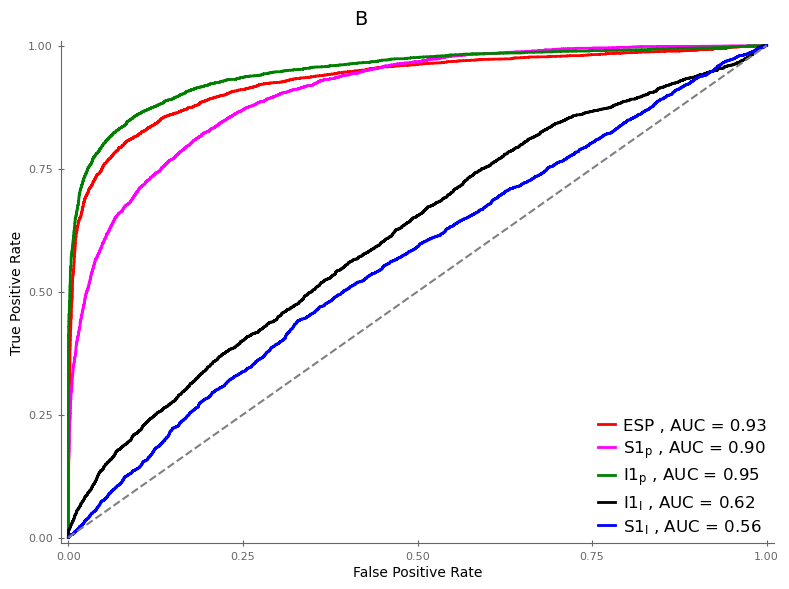

In [54]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label} , AUC = {roc_auc:.2f}', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(8, 6))
plt.rcParams.update({'font.size': 10}) 
# Define your data and labels here
"""
data = [
    (fpr_esm1b_ts_ecfp_ESP_3S, tpr_esm1b_ts_ecfp_ESP_3S, roc_auc_esm1b_ts_ecfp_ESP_3S, 'ESP, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_ESP_3S, tpr_esm1b_ts_gnn_ESP_3S, roc_auc_esm1b_ts_gnn_ESP_3S, 'ESP, [ESM1bts + PreGNN]', 'dashed', 'red'),
    (fpr_esm1b_ts_ecfp_C1f_3S, tpr_esm1b_ts_ecfp_C1f_3S, roc_auc_esm1b_ts_ecfp_C1f_3S, 'S1p, [ESM1bts + ECFP]', 'solid', 'magenta'),
    (fpr_esm1b_ts_gnn_C1f_3S, tpr_esm1b_ts_gnn_C1f_3S, roc_auc_esm1b_ts_gnn_C1f_3S, 'S1p, [ESM1bts + PreGNN]', 'dashed', 'magenta'),
    (fpr_esm1b_ts_ecfp_I1f_3S, tpr_esm1b_ts_ecfp_I1f_3S, roc_auc_esm1b_ts_ecfp_I1f_3S, 'I1p, [ESM1bts + ECFP]', 'solid', 'green'),
    (fpr_esm1b_ts_gnn_I1f_3S, tpr_esm1b_ts_gnn_I1f_3S, roc_auc_esm1b_ts_gnn_I1f_3S, 'I1p, [ESM1bts + PreGNN]', 'dashed', 'green'),
    (fpr_esm1b_ts_ecfp_I1e_3S, tpr_esm1b_ts_ecfp_I1e_3S, roc_auc_esm1b_ts_ecfp_I1e_3S, 'I1l, [ESM1bts + ECFP]', 'solid', 'black'),
    (fpr_esm1b_ts_gnn_I1e_3S, tpr_esm1b_ts_gnn_I1e_3S, roc_auc_esm1b_ts_gnn_I1e_3S, 'I1l, [ESM1bts + PreGNN]', 'dashed', 'black'),
    (fpr_esm1b_ts_ecfp_C1e_3S, tpr_esm1b_ts_ecfp_C1e_3S, roc_auc_esm1b_ts_ecfp_C1e_3S, 'S1l, [ESM1bts + ECFP]', 'solid', 'blue'),
    (fpr_esm1b_ts_gnn_C1e_3S, tpr_esm1b_ts_gnn_C1e_3S, roc_auc_esm1b_ts_gnn_C1e_3S, 'S1l, [ESM1bts + PreGNN]', 'dashed', 'blue'),
]
"""
data = [
    (fpr_esm1b_ts_ecfp_ESP_3S, tpr_esm1b_ts_ecfp_ESP_3S, roc_auc_esm1b_ts_ecfp_ESP_3S, 'ESP', 'solid', 'red'),
    (fpr_esm1b_ts_ecfp_C1f_3S, tpr_esm1b_ts_ecfp_C1f_3S, roc_auc_esm1b_ts_ecfp_C1f_3S, 'S1$_{p}$', 'solid', 'magenta'),
    (fpr_esm1b_ts_ecfp_I1f_3S, tpr_esm1b_ts_ecfp_I1f_3S, roc_auc_esm1b_ts_ecfp_I1f_3S, 'I1$_{p}$', 'solid', 'green'),
    (fpr_esm1b_ts_ecfp_I1e_3S, tpr_esm1b_ts_ecfp_I1e_3S, roc_auc_esm1b_ts_ecfp_I1e_3S, 'I1$_{l}$', 'solid', 'black'),
    (fpr_esm1b_ts_ecfp_C1e_3S, tpr_esm1b_ts_ecfp_C1e_3S, roc_auc_esm1b_ts_ecfp_C1e_3S, 'S1$_{l}$', 'solid', 'blue'),
]
# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)
ax.tick_params(axis='x', labelsize=8)  # Smaller x-axis numbers
ax.tick_params(axis='y', labelsize=8)

# Set legend
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], '--', color='gray', linewidth=1.5)
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.title('B', x=0.42,fontsize=14)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curves for train:test:val(70:20:10) Splits')
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('/Users/vahidatabaigi/Desktop/Thesis/thesis-template/Figures/AUC3S.png', dpi=600, bbox_inches='tight')
plt.savefig('/Users/vahidatabaigi/Desktop/AUC3S.png', dpi=600, bbox_inches='tight')
plt.show()


### 

In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to calculate MCC and Accuracy
def calculate_metrics(y_true, y_pred):
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    cm = confusion_matrix(y_true, y_pred_binary)
    TN, FP, FN, TP = cm.ravel()
    
    # Calculate MCC
    numerator = (TP * TN) - (FP * FN)
    denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    mcc = numerator / denominator if denominator > 0 else 0  # Handle division by zero
    
    # Calculate Accuracy
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    return mcc, accuracy

# Dataset names and their corresponding true and predicted labels
datasets = [
    ('ECFP ESP', test_y_esm1b_ts_ecfp_ESP_3S, y_test_pred_esm1b_ts_ecfp_ESP_3S),
    ('GNN ESP', test_y_esm1b_ts_gnn_ESP_3S, y_test_pred_esm1b_ts_gnn_ESP_3S),
    ('ECFP S1l', test_y_esm1b_ts_ecfp_C1e_3S, y_test_pred_esm1b_ts_ecfp_C1e_3S),
    ('GNN S1l', test_y_esm1b_ts_gnn_C1e_3S, y_test_pred_esm1b_ts_gnn_C1e_3S),
    ('ECFP S1p', test_y_esm1b_ts_ecfp_C1f_3S, y_test_pred_esm1b_ts_ecfp_C1f_3S),
    ('GNN S1p', test_y_esm1b_ts_gnn_C1f_3S, y_test_pred_esm1b_ts_gnn_C1f_3S),
    ('ECFP I1l', test_y_esm1b_ts_ecfp_I1e_3S, y_test_pred_esm1b_ts_ecfp_I1e_3S),
    ('GNN I1l', test_y_esm1b_ts_gnn_I1e_3S, y_test_pred_esm1b_ts_gnn_I1e_3S),
    ('ECFP I1p', test_y_esm1b_ts_ecfp_I1f_3S, y_test_pred_esm1b_ts_ecfp_I1f_3S),
    ('GNN I1p', test_y_esm1b_ts_gnn_I1f_3S, y_test_pred_esm1b_ts_gnn_I1f_3S)
]

# Calculate MCC and Accuracy for each dataset
results = []
for name, y_true, y_pred in datasets:
    mcc, accuracy = calculate_metrics(y_true, y_pred)
    results.append((name, mcc, accuracy))

# Create and display the results table
print(f"{'Model':<20} {'MCC':<10} {'Accuracy':<10}")
print("=" * 40)
for name, mcc, accuracy in results:
    print(f"{name:<20} {mcc:.4f}    {accuracy:.4f}")


Model                MCC        Accuracy  
ECFP ESP             0.7065    0.8840
GNN ESP              0.7113    0.8867
ECFP S1l             0.0952    0.5824
GNN S1l              0.0302    0.4073
ECFP S1p             0.5737    0.8080
GNN S1p              0.4606    0.6939
ECFP I1l             0.1443    0.5255
GNN I1l              0.1038    0.5660
ECFP I1p             0.7503    0.9018
GNN I1p              0.7474    0.9020


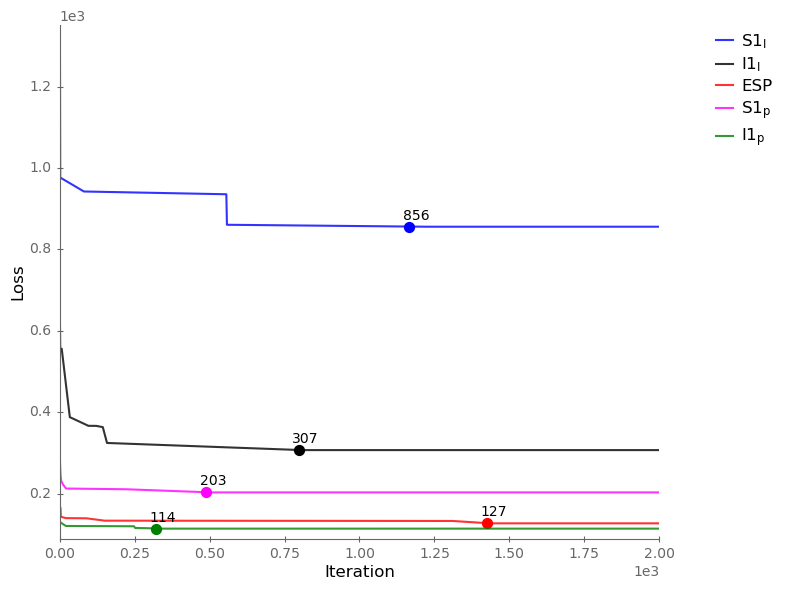

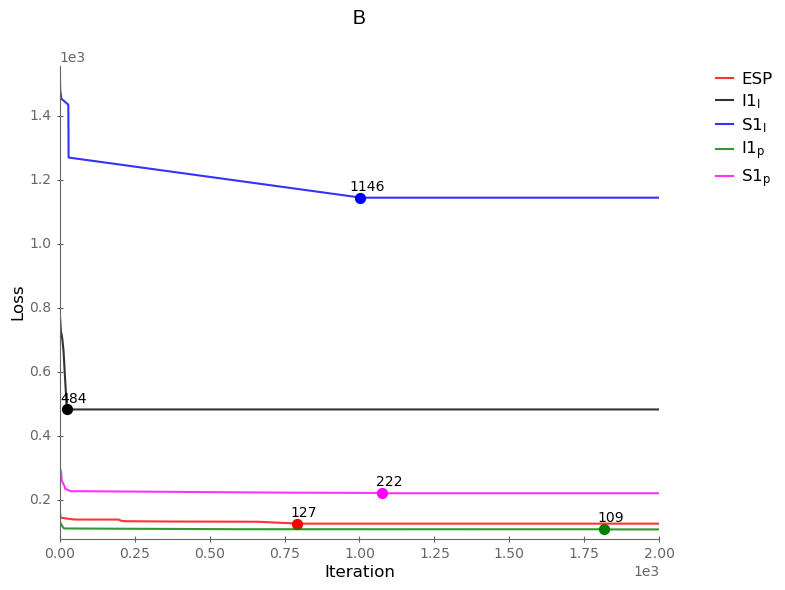

In [60]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESP': 'red', 'S1$_{l}$': 'blue', 'S1$_{p}$': 'magenta', 'I1$_{l}$': 'black', 'I1$_{p}$': 'green'}

plotting_loss("ECFP", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=3)
plotting_loss("PreGNN", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=3,title="B")

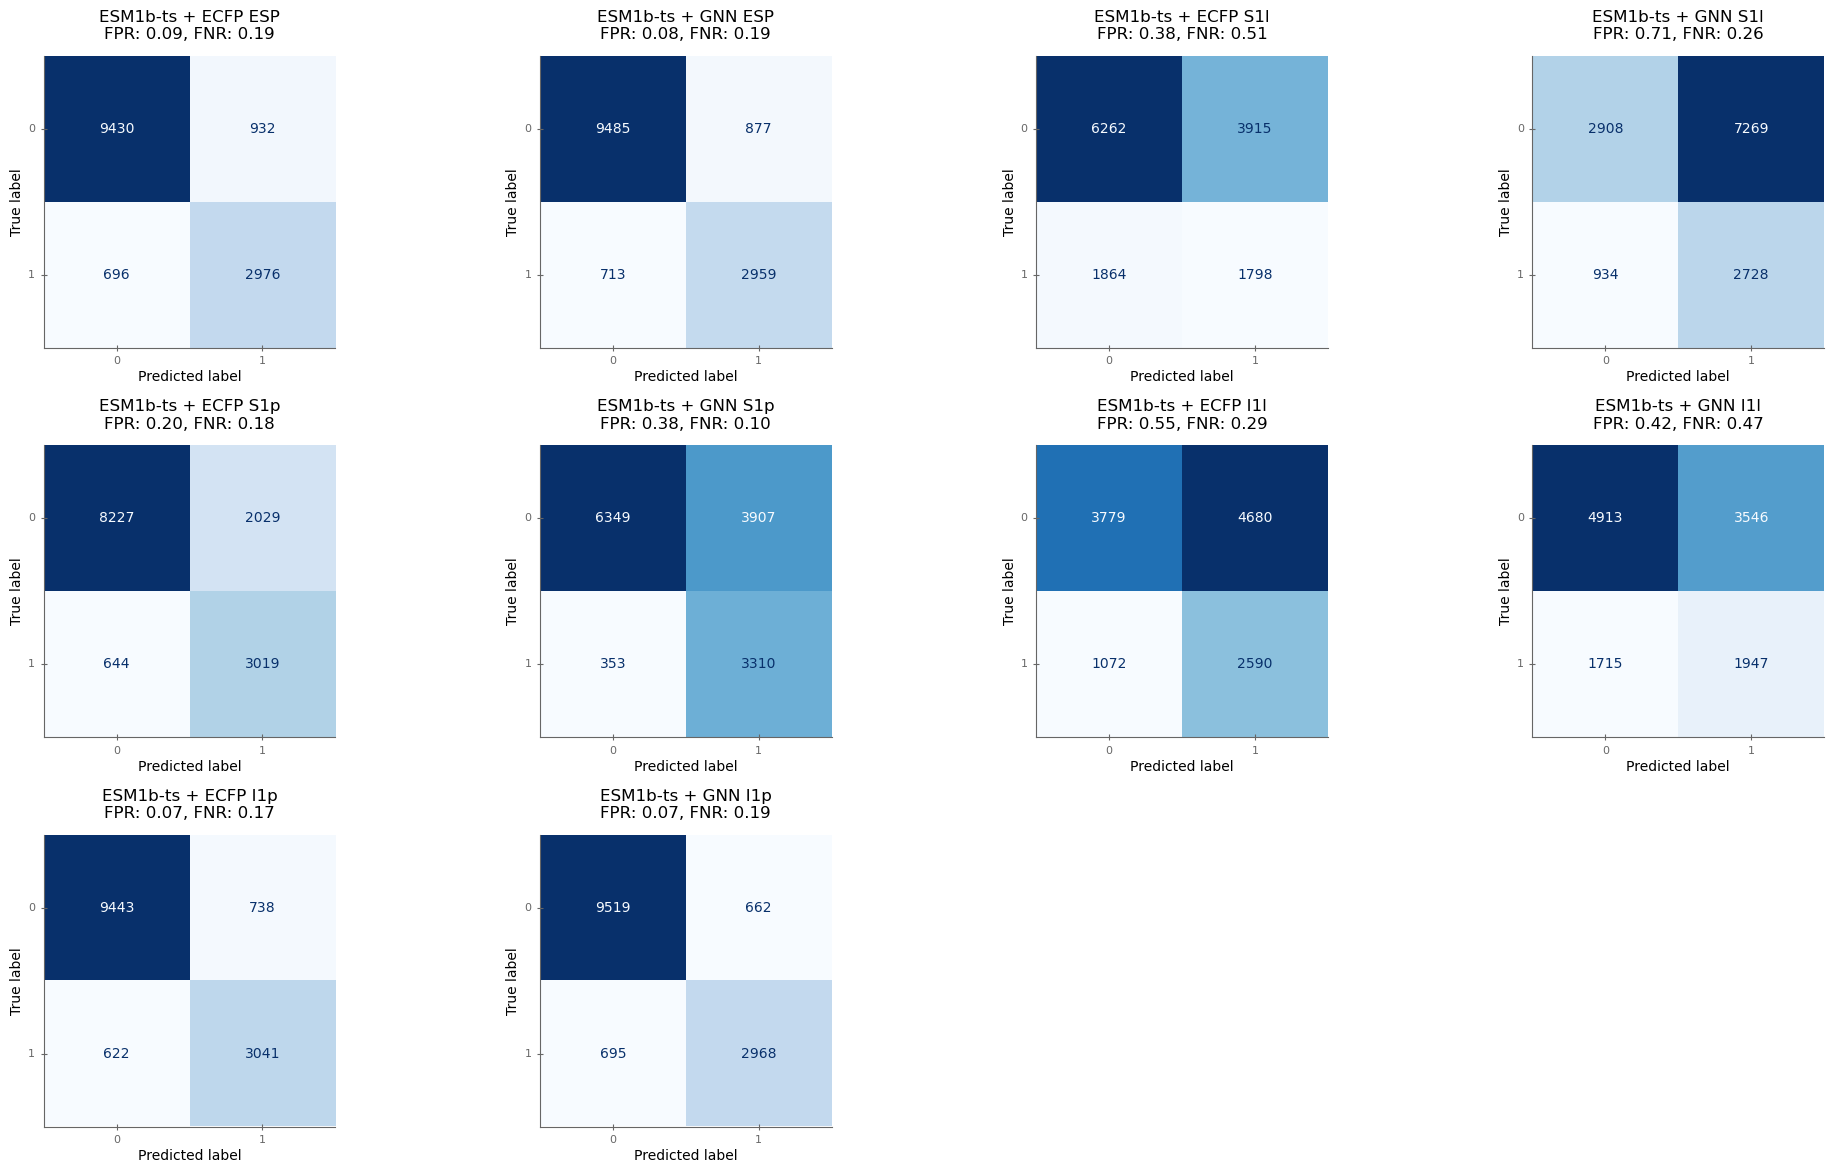

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def calculate_fpr_fnr(y_true, y_pred):
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    cm = confusion_matrix(y_true, y_pred_binary)
    TN, FP, FN, TP = cm.ravel()
    fpr = FP / (FP + TN)
    fnr = FN / (FN + TP)
    return fpr, fnr, cm
datasets = [
    ('ECFP ESP', test_y_esm1b_ts_ecfp_ESP_3S, y_test_pred_esm1b_ts_ecfp_ESP_3S),
    ('GNN ESP', test_y_esm1b_ts_gnn_ESP_3S, y_test_pred_esm1b_ts_gnn_ESP_3S),
    ('ECFP S1l', test_y_esm1b_ts_ecfp_C1e_3S, y_test_pred_esm1b_ts_ecfp_C1e_3S),
    ('GNN S1l', test_y_esm1b_ts_gnn_C1e_3S, y_test_pred_esm1b_ts_gnn_C1e_3S),
    ('ECFP S1p', test_y_esm1b_ts_ecfp_C1f_3S, y_test_pred_esm1b_ts_ecfp_C1f_3S),
    ('GNN S1p', test_y_esm1b_ts_gnn_C1f_3S, y_test_pred_esm1b_ts_gnn_C1f_3S),
    ('ECFP I1l', test_y_esm1b_ts_ecfp_I1e_3S, y_test_pred_esm1b_ts_ecfp_I1e_3S),
    ('GNN I1l', test_y_esm1b_ts_gnn_I1e_3S, y_test_pred_esm1b_ts_gnn_I1e_3S),
    ('ECFP I1p', test_y_esm1b_ts_ecfp_I1f_3S, y_test_pred_esm1b_ts_ecfp_I1f_3S),
    ('GNN I1p', test_y_esm1b_ts_gnn_I1f_3S, y_test_pred_esm1b_ts_gnn_I1f_3S)
]

n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))
#fig.suptitle('Confusion Matrices for Different Models (3 splits)', fontsize=14)
for i, (name, y_true, y_pred) in enumerate(datasets):
    fpr, fnr, cm = calculate_fpr_fnr(y_true, y_pred)
    row, col = divmod(i, n_cols)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[row, col], cmap='Blues', colorbar=False)
    axes[row, col].set_title(f"ESM1b-ts + {name}\nFPR: {fpr:.2f}, FNR: {fnr:.2f}", fontsize=12)
    for text in axes[row, col].texts:
        text.set_fontsize(10)
    axes[row, col].tick_params(axis='both', which='major', labelsize=8)
    axes[row, col].set_xlabel(axes[row, col].get_xlabel(), fontsize=10)
    axes[row, col].set_ylabel(axes[row, col].get_ylabel(), fontsize=10)
for j in range(len(datasets), n_rows * n_cols):
    fig.delaxes(axes.flat[j])
plt.subplots_adjust(hspace=0.9, wspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('/Users/vahidatabaigi/Desktop/Thesis/thesis-template/Figures/CM3S.png', dpi=600, bbox_inches='tight')
plt.show()

# C1e vs C2

### ROC-AUC score for C1 splits vs C2 split

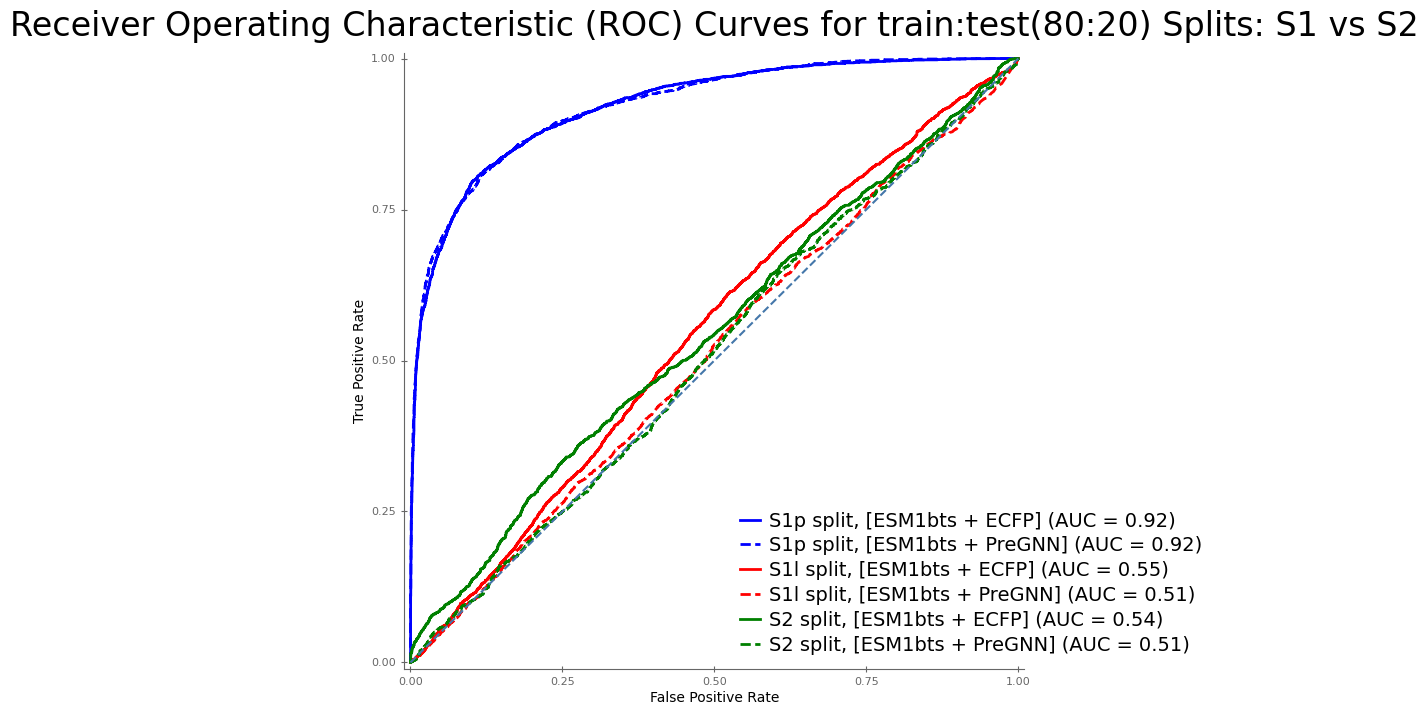

In [43]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label} (AUC = {roc_auc:.2f})', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 20})

# Define your data and labels here
data = [
    
    (fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S, roc_auc_esm1b_ts_ecfp_C1f_2S, 'S1p split, [ESM1bts + ECFP]', 'solid', 'blue'),
    (fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S, roc_auc_esm1b_ts_gnn_C1f_2S, 'S1p split, [ESM1bts + PreGNN]', 'dashed', 'blue'),

    (fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S, roc_auc_esm1b_ts_ecfp_C1e_2S, 'S1l split, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S, roc_auc_esm1b_ts_gnn_C1e_2S, 'S1l split, [ESM1bts + PreGNN]', 'dashed', 'red'),
    
    (fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S, roc_auc_esm1b_ts_ecfp_C2_2S, 'S2 split, [ESM1bts + ECFP]', 'solid','green'),
    (fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S, roc_auc_esm1b_ts_gnn_C2_2S,'S2 split, [ESM1bts + PreGNN]', 'dashed','green'),

]
# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)
ax.tick_params(axis='x', labelsize=8)  # Smaller x-axis numbers
ax.tick_params(axis='y', labelsize=8)

# Set legend
plt.legend(loc='lower right', bbox_to_anchor=(1.30, 0.01), fontsize=14)
plt.plot([0, 1], [0, 1], '--')
eps = 0.01
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for train:test(80:20) Splits: S1 vs S2')
plt.show()


# Similarity-based leakage calculation

### two-split

In [44]:
df_results = pd.read_csv(join("..", "data", "2splits", "similarity_leakage_results.csv"))
df_results

,train_test_smiles_leakage,train_val_smiles_leakage,test_val_smiles_leakage,train_test_protein_leakage,train_val_protein_leakage,test_val_protein_leakage,Split method,Fold_number
0,4.49,13.16,1.49,5.75,10.84,1.59,C1e,0
1,4.78,14.04,1.20,5.83,10.33,1.41,C1e,1
2,4.89,12.28,1.09,6.02,9.91,1.30,C1e,2
3,4.58,16.52,1.40,5.74,12.04,1.55,C1e,3
4,5.18,7.38,0.80,6.63,7.05,0.66,C1e,4
5,9.28,12.38,2.97,6.28,11.45,1.80,I1e,0
6,9.86,10.87,2.39,6.66,10.21,1.40,I1e,1
7,8.88,14.23,3.37,6.40,12.32,1.67,I1e,2
8,10.39,9.18,1.86,6.83,8.79,1.24,I1e,3
9,10.58,7.69,1.67,7.09,7.59,0.97,I1e,4


In [45]:
df_avg_results = df_results.groupby('Split method').mean().reset_index().drop(columns=["Fold_number"])
Accuray = {"ESPC2":0.9046,"ESP": 0.9153, "I1f": 0.9129, "I1e": 0.7457, "C1f": 0.8800, "C1e": 0.6846, "C2":0.2963}
df_avg_results['Accuray'] = df_avg_results['Split method'].map(Accuray)
#df_results.to_csv("leakage_results.csv", index=False)
df_avg_results




,Split method,train_test_smiles_leakage,train_val_smiles_leakage,test_val_smiles_leakage,train_test_protein_leakage,train_val_protein_leakage,test_val_protein_leakage,Accuray
0,C1e,4.784,12.676,1.196,5.994,10.034,1.302,0.6846
1,C1f,12.958,10.146,3.240,2.162,6.968,0.538,0.8800
2,C2,4.036,12.880,1.008,1.132,11.406,0.260,0.2963
3,ESP,13.096,10.078,3.274,5.204,6.210,1.296,0.9153
4,ESPC2,12.722,10.278,3.178,5.518,6.736,1.372,0.9046
5,I1e,9.798,10.870,2.452,6.652,10.072,1.416,0.7457
6,I1f,12.984,10.136,3.246,5.794,6.322,1.442,0.9129


In [46]:
numeric_columns = df_avg_results.select_dtypes(include=['float64', 'int64'])
correlation_with_auc = numeric_columns.corr()['Accuray']
correlation_with_auc

train_test_smiles_leakage     0.890910
train_val_smiles_leakage     -0.884315
test_val_smiles_leakage       0.890997
train_test_protein_leakage    0.557720
train_val_protein_leakage    -0.890138
test_val_protein_leakage      0.653367
Accuray                       1.000000
Name: Accuray, dtype: float64

### Three-split

In [52]:
df_results = pd.read_csv(join("..", "data", "3splits", "Similarity_leakage_results_3S.csv"))
Accuracy = {"ESP": 0.8840, "I1f": 0.9018, "I1e": 0.5255, "C1f": 0.8080, "C1e": 0.5824}
#Accuracy = {"ESP": 0.87, "I1f": 0.90, "I1e": 0.45, "C1f": 0.82, "C1e": 0.62}
df_results['Accuracy'] = df_results['Split method'].map(Accuracy)
df_results

,train_test_smiles_leakage,train_val_smiles_leakage,test_val_smiles_leakage,train_test_protein_leakage,train_val_protein_leakage,test_val_protein_leakage,Split method,Accuracy
0,6.78,3.09,0.91,5.92,3.05,0.63,C1e,0.5824
1,12.46,6.40,1.47,4.69,3.69,0.83,I1e,0.5255
2,13.88,7.19,2.05,2.33,1.18,0.36,C1f,0.8080
3,14.19,7.04,2.08,7.00,2.77,1.49,I1f,0.9018
4,14.19,7.09,2.10,5.26,2.76,0.78,ESP,0.8840


In [53]:
numeric_columns = df_results.select_dtypes(include=['float64', 'int64'])
correlation_with_auc = numeric_columns.corr()['Accuracy']
correlation_with_auc

train_test_smiles_leakage     0.686280
train_val_smiles_leakage      0.637716
test_val_smiles_leakage       0.862527
train_test_protein_leakage    0.082821
train_val_protein_leakage    -0.542288
test_val_protein_leakage      0.339228
Accuracy                      1.000000
Name: Accuracy, dtype: float64

In [54]:


# Convert the correlation series to a DataFrame, transpose it, and name the row 'Correlation with AUC'
correlation_row = pd.DataFrame(correlation_with_auc).T
correlation_row.index = ['p']

# Append the new row to the original DataFrame
df_results = pd.concat([df_results, correlation_row], ignore_index=False)
df_results.round(2)

,train_test_smiles_leakage,train_val_smiles_leakage,test_val_smiles_leakage,train_test_protein_leakage,train_val_protein_leakage,test_val_protein_leakage,Split method,Accuracy
0,6.78,3.09,0.91,5.92,3.05,0.63,C1e,0.58
1,12.46,6.40,1.47,4.69,3.69,0.83,I1e,0.53
2,13.88,7.19,2.05,2.33,1.18,0.36,C1f,0.81
3,14.19,7.04,2.08,7.00,2.77,1.49,I1f,0.90
4,14.19,7.09,2.10,5.26,2.76,0.78,ESP,0.88
p,0.69,0.64,0.86,0.08,-0.54,0.34,NaN,1.00
